%pip install awscli
%pip install boto3

import os
import sys

!git clone https://${github_astro_guard_token}@github.com/zLPrime/astro-guard.git

In [1]:
import os
import sys

sys.path.append('./astro-guard/ml-workbench')

In [2]:
from astro_data import dataloader
from sklearn.preprocessing import LabelEncoder

sys.path.append('./astro-guard/ml-workbench')
label_encoder = LabelEncoder()

train_data_1d, test_data_1d = dataloader.get_train_test(dataloader.get_jd_magn_1d_dataset(
    os.environ['aws_access_key_id'],
    os.environ['aws_secret_access_key'], label_encoder,
    cache_path='./astro-guard/ml-workbench/astro_data/objects_cache.json'),
                                                  batch_size=16)

train_data_2d, test_data_2d = dataloader.get_train_test(dataloader.get_jd_magn_graph_dataset(
    os.environ['aws_access_key_id'],
    os.environ['aws_secret_access_key'], label_encoder,
    cache_path='./astro-guard/ml-workbench/astro_data/objects_cache.json'),
                                                  batch_size=16)

Loading object keys from cache...
Loading object keys from cache...


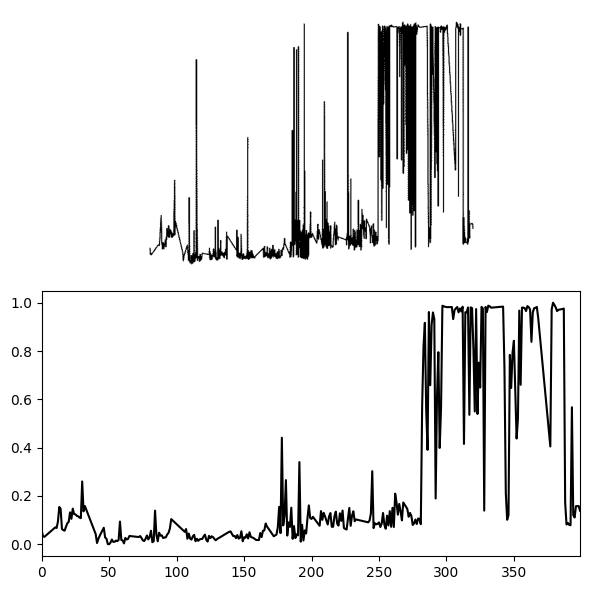

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(2, 1, figsize=(6, 6), gridspec_kw={'height_ratios': [1, 1]})

batch_1d, _ = next(iter(train_data_1d))
y = batch_1d[0][0]

batch_2d, _ = next(iter(train_data_2d))
pil_image = batch_2d[0][0]
# --- Show the image ---
axs[0].imshow(pil_image, cmap='gray')
axs[0].axis('off')

# --- Plot the 1D graph ---
axs[1].plot(y, color='black')
axs[1].set_xlim(0, len(y)-1)

# Layout and show
plt.tight_layout()
plt.show()

In [4]:
from astro_model.model import JDLightCurve1DCNN
from astro_train.trainer import train_and_monitor
from torch import cuda

model = JDLightCurve1DCNN(3)
device = 'cuda' if cuda.is_available() else 'cpu'

In [5]:
train_and_monitor(model, train_data_1d, 50, device=device, val_loader=test_data_1d, patience=5)

Epoch 1/50: 100%|██████████| 88/88 [00:13<00:00,  6.39it/s, Train Loss=0.6628, Train Acc=61.48%]


Validation Loss: 0.5442 | Validation Accuracy: 73.00%
Best model saved with accuracy: 73.00%


Epoch 2/50: 100%|██████████| 88/88 [00:09<00:00,  9.36it/s, Train Loss=0.5438, Train Acc=73.67%]


Validation Loss: 0.4940 | Validation Accuracy: 77.17%
Best model saved with accuracy: 77.17%


Epoch 3/50: 100%|██████████| 88/88 [00:09<00:00,  9.29it/s, Train Loss=0.5023, Train Acc=75.55%]


Validation Loss: 0.4578 | Validation Accuracy: 79.17%
Best model saved with accuracy: 79.17%


Epoch 4/50: 100%|██████████| 88/88 [00:09<00:00,  9.39it/s, Train Loss=0.4636, Train Acc=77.42%]


Validation Loss: 0.4408 | Validation Accuracy: 79.33%
Best model saved with accuracy: 79.33%


Epoch 5/50: 100%|██████████| 88/88 [00:09<00:00,  9.46it/s, Train Loss=0.4330, Train Acc=78.59%]


Validation Loss: 0.4270 | Validation Accuracy: 79.50%
Best model saved with accuracy: 79.50%


Epoch 6/50: 100%|██████████| 88/88 [00:10<00:00,  8.44it/s, Train Loss=0.4106, Train Acc=80.23%]


Validation Loss: 0.4204 | Validation Accuracy: 80.50%
Best model saved with accuracy: 80.50%


Epoch 7/50: 100%|██████████| 88/88 [00:09<00:00,  9.36it/s, Train Loss=0.3913, Train Acc=81.80%]


Validation Loss: 0.4147 | Validation Accuracy: 81.17%
Best model saved with accuracy: 81.17%


Epoch 8/50: 100%|██████████| 88/88 [00:09<00:00,  9.37it/s, Train Loss=0.3754, Train Acc=83.05%]


Validation Loss: 0.4144 | Validation Accuracy: 81.33%
Best model saved with accuracy: 81.33%


Epoch 9/50: 100%|██████████| 88/88 [00:09<00:00,  9.14it/s, Train Loss=0.3605, Train Acc=84.38%]


Validation Loss: 0.4138 | Validation Accuracy: 81.00%


Epoch 10/50: 100%|██████████| 88/88 [00:09<00:00,  9.23it/s, Train Loss=0.3453, Train Acc=84.84%]


Validation Loss: 0.4081 | Validation Accuracy: 82.00%
Best model saved with accuracy: 82.00%


Epoch 11/50: 100%|██████████| 88/88 [00:10<00:00,  8.34it/s, Train Loss=0.3323, Train Acc=85.39%]


Validation Loss: 0.4126 | Validation Accuracy: 82.00%


Epoch 12/50: 100%|██████████| 88/88 [00:09<00:00,  9.15it/s, Train Loss=0.3155, Train Acc=86.25%]


Validation Loss: 0.4133 | Validation Accuracy: 82.17%
Best model saved with accuracy: 82.17%


Epoch 13/50: 100%|██████████| 88/88 [00:09<00:00,  9.28it/s, Train Loss=0.3002, Train Acc=87.19%]


Validation Loss: 0.4195 | Validation Accuracy: 82.33%
Best model saved with accuracy: 82.33%


Epoch 14/50: 100%|██████████| 88/88 [00:09<00:00,  9.20it/s, Train Loss=0.2809, Train Acc=88.28%]


Validation Loss: 0.4233 | Validation Accuracy: 83.00%
Best model saved with accuracy: 83.00%


Epoch 15/50: 100%|██████████| 88/88 [00:09<00:00,  9.27it/s, Train Loss=0.2632, Train Acc=89.30%]


Validation Loss: 0.4429 | Validation Accuracy: 83.00%


Epoch 16/50: 100%|██████████| 88/88 [00:10<00:00,  8.38it/s, Train Loss=0.2459, Train Acc=90.08%]


Validation Loss: 0.4502 | Validation Accuracy: 83.17%
Best model saved with accuracy: 83.17%


Epoch 17/50: 100%|██████████| 88/88 [00:09<00:00,  9.22it/s, Train Loss=0.2244, Train Acc=91.64%]


Validation Loss: 0.4647 | Validation Accuracy: 83.00%


Epoch 18/50: 100%|██████████| 88/88 [00:09<00:00,  9.24it/s, Train Loss=0.2051, Train Acc=92.50%]


Validation Loss: 0.4894 | Validation Accuracy: 83.17%


Epoch 19/50: 100%|██████████| 88/88 [00:09<00:00,  9.19it/s, Train Loss=0.1839, Train Acc=93.12%]


Validation Loss: 0.4973 | Validation Accuracy: 83.17%


Epoch 20/50: 100%|██████████| 88/88 [00:09<00:00,  9.04it/s, Train Loss=0.1639, Train Acc=94.22%]


Validation Loss: 0.5416 | Validation Accuracy: 82.50%


Epoch 21/50: 100%|██████████| 88/88 [00:10<00:00,  8.39it/s, Train Loss=0.1430, Train Acc=94.92%]


Validation Loss: 0.5968 | Validation Accuracy: 81.33%
Early stopping triggered at epoch 21


In [6]:
from astro_test.test import print_evaluate

print_evaluate(model, test_data_1d, label_encoder, device)

100%|██████████| 38/38 [00:03<00:00, 10.62it/s]



Accuracy: 0.8133333333333334
Classification Report:
                precision    recall  f1-score   support

nonvariables/       0.79      0.87      0.83       309
   variables/       0.84      0.76      0.80       291

     accuracy                           0.81       600
    macro avg       0.82      0.81      0.81       600
 weighted avg       0.82      0.81      0.81       600



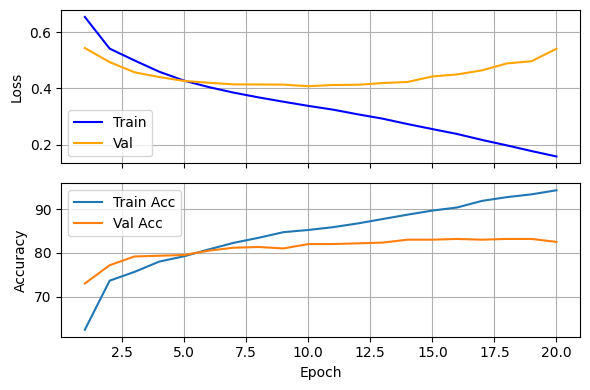

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('training_log.csv')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 4))

ax1.plot(df['epoch'], df['train_loss'], label='Train', color='blue')
ax1.plot(df['epoch'], df['val_loss'], label='Val', color='orange')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True)

ax2.plot(df['epoch'], df['train_acc'], label='Train')
ax2.plot(df['epoch'], df['val_acc'], label='Val')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()